# Figure 02: Ground state - more details

Please check out [figure-02-ground-state.ipynb](figure-02-ground-state.ipynb) first. 

In this notebook, we add computation of metastable states, and computational of the total energy.

We still focus on two points from the parameter space, as shown in the following figure:

<img src="phase-diagram.webp" width=400px>

More precisely, we are going to simulate:

- $(d, \mu_{0}H) = (80\,\text{nm}, 0.2\,\text{T})$ - red dot
- $(d, \mu_{0}H) = (160\,\text{nm}, 0.3\,\text{T})$ - green triangle

The first value is the disk diameter $d$ (thickness is always $10\,\text{nm}$) and the second value is an external magnetic field $H$ applied in the out-of-plane direction.

We are going to relax the system starting from the uniform state. The function to simulate a single point in the parameter space is `parameter_space_point`:

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

def parameter_space_point(d, B, initial_state):
    """
    Expected parameters:
    - d : disk diametre [in metres]
    - B : applied field [in Tesla]
    - initial_state: 'skyrmion' or 'uniform'"""
    thickness = 10e-9
    cell = (2.5e-9, 2.5e-9, 2.5e-9)
    p1 = (-d/2, -d/2, -thickness/2)
    p2 = (d/2, d/2, thickness/2)
    mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)
    
    D = 1.58e-3
    Ms = 3.84e5
    A = 8.78e-12

    def Ms_fun(pos):
        x, y, z = pos
        if x**2 + y**2 <= (d/2)**2:
            return Ms
        else:
            return 0

    def m_fun(pos):
        x, y, z = pos
        if x**2 + y**2 <= (d/4)**2:
            return (0, 0, -1)
        else:
            return (0, 0, 1)
        
    if initial_state == 'skyrmion':
        value = m_fun
    elif initial_state == 'uniform':
        value = (0, 0, 1)
        
    system = oc.System(name='parameter-space-point')
    system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, crystalclass='T') + oc.Demag() + \
        oc.Zeeman(H=(0, 0, B/oc.consts.mu0))
    system.m = df.Field(mesh, dim=3, value=value, norm=Ms_fun)
    
    md = oc.MinDriver()
    md.drive(system, overwrite=True)
    
    return system

## Small disk - different initial conditions

We investigate the red dot configuration first: the diametre of this 'small' disk is 80 nm, and the applied field is 0.2T.

### Small disk - Uniform initial configuration

In [2]:
system1_uniform = parameter_space_point(80e-9, 0.2, initial_state='uniform')

2019/12/01 12:50: Running OOMMF (parameter-space-point.mif) ... (1.9 s)


We plot the magnetisation in two ways:

In [3]:
system1_uniform.m.plane(z=0, n=(20, 20)).k3d_vectors(color_field=system1_uniform.m.z, head_size=20)

Output()

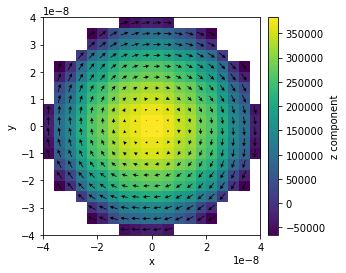

In [4]:
system1_uniform.m.plane(z=0, n=(20, 20)).mpl()

From the uniform initial configuratino we obtain this 'quasi-uniform' configuration, which is called 'incomplete skyrmion' in this work.


### Small disk - Skyrmion-like initial configuration

In [5]:
system1_skyrmion = parameter_space_point(80e-9, 0.2, initial_state='skyrmion')


2019/12/01 12:50: Running OOMMF (parameter-space-point.mif) ... (2.1 s)


The magnetisation is

In [6]:
system1_skyrmion.m.plane(z=0, n=(20, 20)).k3d_vectors(color_field=system1_skyrmion.m.z, head_size=20)

Output()

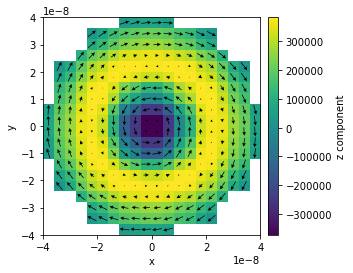

In [7]:
system1_skyrmion.m.plane(z=0, n=(20, 20)).mpl()

From a skyrmion-like configuration as the initial configuration, we obtain an skyrmion configuration after minimising the energy (i.e. an isolated skyrmion in the terminology of this work).

We conclude that for a radius of 80nm, both the "incomplete skyrmion" and the "isolated skyrmion" are meta-stable configurations. We can compare the total energy of the system, to decide which one has the lower energy (and thus is potentially the ground state):

In [8]:
system1_skyrmion.total_energy()

-4.73886616609e-18

In [9]:
system1_uniform.total_energy()

-5.76984477499e-18

We conlude that the 'incomplete skyrmion' (which we obtained starting from the uniform configuration) has the lower energy at this diametre of 80nm.

## We repeat the above study for a large disk

We use a diametre of 160nm (green triangle in the phase diagram show at the top), and an aplied field of 0.3T.

### Large disk - uniform initial configuration

In [10]:
system2_uniform = parameter_space_point(160e-9, 0.3, initial_state='uniform')

2019/12/01 12:50: Running OOMMF (parameter-space-point.mif) ... (2.7 s)


We plot the magnetisation in two ways:

In [11]:
system2_uniform.m.plane(z=0, n=(30, 30)).k3d_vectors(color_field=system2_uniform.m.z, head_size=40)

Output()

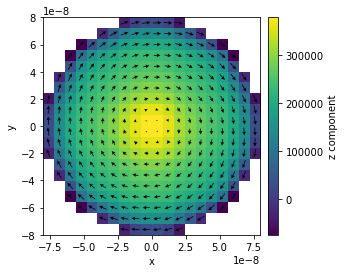

In [12]:
system2_uniform.m.plane(z=0, n=(20, 20)).mpl()

From the uniform initial configuration, we obtain this 'quasi-uniform' configuration, which is called 'incomplete skyrmion' in this work.


### Large disk - Skyrmion-like initial configuration

In [13]:
system2_skyrmion = parameter_space_point(160e-9, 0.3, initial_state='skyrmion')


2019/12/01 12:50: Running OOMMF (parameter-space-point.mif) ... (2.6 s)


The magnetisation is

In [14]:
system2_skyrmion.m.plane(z=0, n=(30, 30)).k3d_vectors(color_field=system2_skyrmion.m.z, head_size=40)

Output()

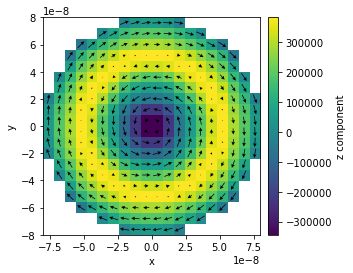

In [15]:
system2_skyrmion.m.plane(z=0, n=(20, 20)).mpl()

From a skyrmion-like configuration as the initial configuration, we obtain an skyrmion configuration after minimising the energy (i.e. an isolated skyrmion in the terminology of this work).

We conclude that for a radius of 80nm, both the "incomplete skyrmion" and the "isolated skyrmion" are meta-stable configurations. We can compare the total energy of the system, to decide which one has the lower energy (and thus is potentially the ground state):

In [16]:
system2_skyrmion.total_energy()

-2.30818938003e-17

In [17]:
system2_uniform.total_energy()

-2.15803609004e-17

We conlude that the 'isolated skyrmion' (which we obtained starting from the skyrmion-like configuration) has the lower energy at this diametre of 160nm.

### Other initial configurations

The study has tried other initial configurations (see paper for details), including random configurations, to attempt to find configurations with the lowest energy possible, but none of them had lower energies than the relaxed configurations reported here.